<h1><b> Credit card customer segmentation</b> </h1>

# **1. Overview**

### **Objective :**
This case requires to develop a customer segmentation to give recommendations like saving plans, loans, wealth management, etc. on target customer groups. 
### **Data Description :**
The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.
### **Data :**  
Use the below link to download the Data Set:[here](https://www.kaggle.com/arjunbhasin2013/ccdata)

### **Attribute Information :**
Following is the Data Dictionary for customer's credit card dataset :-

<b> CUSTID :</b> Identification of Credit Card holder (Categorical)<br>
<b>BALANCE :</b> Balance amount left in their account to make purchases<br>
<b>BALANCEFREQUENCY :</b> How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)<br>
<b>PURCHASES :</b> Amount of purchases made from account<br>
<b>ONEOFFPURCHASES :</b> Maximum purchase amount done in one-go<br>
<b>INSTALLMENTSPURCHASES :</b> Amount of purchase done in installment<br>
<b>CASHADVANCE :</b> Cash in advance given by the user<br>
<b>PURCHASESFREQUENCY :</b> How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)<br>
<b>ONEOFFPURCHASESFREQUENCY :</b> How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)<br>
PURCHASESINSTALLMENTSFREQUENCY :</b> How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)<br>
<b>CASHADVANCEFREQUENCY :</b> How frequently the cash in advance being paid<br>
<b>CASHADVANCETRX :</b> Number of Transactions made with "Cash in Advanced"<br>
<b>PURCHASESTRX :</b> Numbe of purchase transactions made<br>
<b>CREDITLIMIT :</b> Limit of Credit Card for user<br>
<b>PAYMENTS :</b> Amount of Payment done by user<br>
<b>MINIMUM_PAYMENTS :</b> Minimum amount of payments made by user<br>
<b>PRCFULLPAYMENT :</b> Percent of full payment paid by user<br>
<b>TENURE :</b> Tenure of credit card service for user<br>


# **2. Import Libraries:**

In [110]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.impute import KNNImputer


# **3. Load Dataset:**

In [111]:
# import the dataset
creditcard_df = pd.read_csv("credit_card_dataset.csv")
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# **4.Exploratory Data Analysis & Data Cleaning:**

In [112]:
creditcard_df.shape

(8950, 18)

In [113]:
# information about the data
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [114]:
# Check the statistics summary of the dataframe
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [115]:
# checking for Null values in data frame
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [116]:
# find all columns having missing values
missing_var = [var for var in creditcard_df.columns if creditcard_df[var].isnull().sum()>0]
missing_var

['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

In [117]:
from sklearn.impute import KNNImputer
creditcard_df_mean_imputed = creditcard_df.copy()
imputer = KNNImputer(n_neighbors=5)
creditcard_df_knn = creditcard_df.copy()
cols_with_missing = ["MINIMUM_PAYMENTS", "CREDIT_LIMIT"]
creditcard_df_knn[cols_with_missing] = imputer.fit_transform(creditcard_df[cols_with_missing])
print("Mean vs KNN imputation difference:")
for col in cols_with_missing:
    mean_diff = abs(creditcard_df_mean_imputed[col].mean() - creditcard_df_knn[col].mean())
    print(f"{col}: Mean difference = {mean_diff:.2f}")
creditcard_df = creditcard_df_knn

Mean vs KNN imputation difference:
MINIMUM_PAYMENTS: Mean difference = 4.51
CREDIT_LIMIT: Mean difference = 0.16


In [118]:
# Again check for null values
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [119]:
# check duplicate entries in the dataset
creditcard_df.duplicated().sum()

0

In [120]:
# drop unnecessary columns
creditcard_df.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [121]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [122]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,1215.951453,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [123]:
# Create ratio and derived features for better segmentation
# Utilization ratio (higher values indicate customers using more of their available credit)
creditcard_df['UTILIZATION_RATIO'] = creditcard_df['BALANCE'] / creditcard_df['CREDIT_LIMIT']
# Payment ratio (how much of their balance they're paying)
creditcard_df['PAYMENT_RATIO'] = creditcard_df['PAYMENTS'] / (creditcard_df['BALANCE'] + 0.01)  # Adding 0.01 to avoid division by zero
# Cash advance to purchase ratio
creditcard_df['CA_TO_PURCHASE_RATIO'] = creditcard_df['CASH_ADVANCE'] / (creditcard_df['PURCHASES'] + 0.01)
# Average purchase amount
creditcard_df['AVG_PURCHASE_SIZE'] = creditcard_df['PURCHASES'] / (creditcard_df['PURCHASES_TRX'] + 0.01)
# Interest efficiency (lower values show customers avoiding interest charges)
creditcard_df['INTEREST_EFFICIENCY'] = 1 - (creditcard_df['MINIMUM_PAYMENTS'] / (creditcard_df['PAYMENTS'] + 0.01))
# Transaction frequency metrics
creditcard_df['TRANS_PER_MONTH'] = creditcard_df['PURCHASES_TRX'] / creditcard_df['TENURE']
creditcard_df['CASH_ADV_PER_MONTH'] = creditcard_df['CASH_ADVANCE_TRX'] / creditcard_df['TENURE']
# Payment behavior metrics
creditcard_df['PAYMENT_TO_MIN_RATIO'] = creditcard_df['PAYMENTS'] / (creditcard_df['MINIMUM_PAYMENTS'] + 0.01)

# Purchase type preference
creditcard_df['ONEOFF_TO_PURCHASE_RATIO'] = creditcard_df['ONEOFF_PURCHASES'] / (creditcard_df['PURCHASES'] + 0.01)
creditcard_df['INSTALLMENT_TO_PURCHASE_RATIO'] = creditcard_df['INSTALLMENTS_PURCHASES'] / (creditcard_df['PURCHASES'] + 0.01)

# Balance to payment ratio
creditcard_df['BALANCE_TO_PAYMENT_RATIO'] = creditcard_df['BALANCE'] / (creditcard_df['PAYMENTS'] + 0.01)


In [124]:
# Advanced ratio features for better customer behavior insights
# Spending diversity (ratio of different purchase types)
creditcard_df['PURCHASE_DIVERSITY'] = (creditcard_df['ONEOFF_PURCHASES'] / 
                                      (creditcard_df['INSTALLMENTS_PURCHASES'] + 0.01))

# Spending consistency across months
creditcard_df['MONTHLY_SPEND_CONSISTENCY'] = creditcard_df['PURCHASES'] / (creditcard_df['TENURE'] + 0.01)

# Financial health indicators
creditcard_df['DEBT_BURDEN_RATIO'] = creditcard_df['BALANCE'] / (creditcard_df['PAYMENTS'] + 0.01)
creditcard_df['CREDIT_UTILIZATION_TREND'] = creditcard_df['BALANCE_FREQUENCY'] * creditcard_df['UTILIZATION_RATIO']

# Behavioral segmentation features
creditcard_df['CASH_VS_PURCHASE_PREFERENCE'] = creditcard_df['CASH_ADVANCE'] / (creditcard_df['PURCHASES'] + 0.01)
creditcard_df['PAYMENT_DISCIPLINE'] = creditcard_df['PRC_FULL_PAYMENT'] * (1 - creditcard_df['MINIMUM_PAYMENTS'] / (creditcard_df['PAYMENTS'] + 0.01))

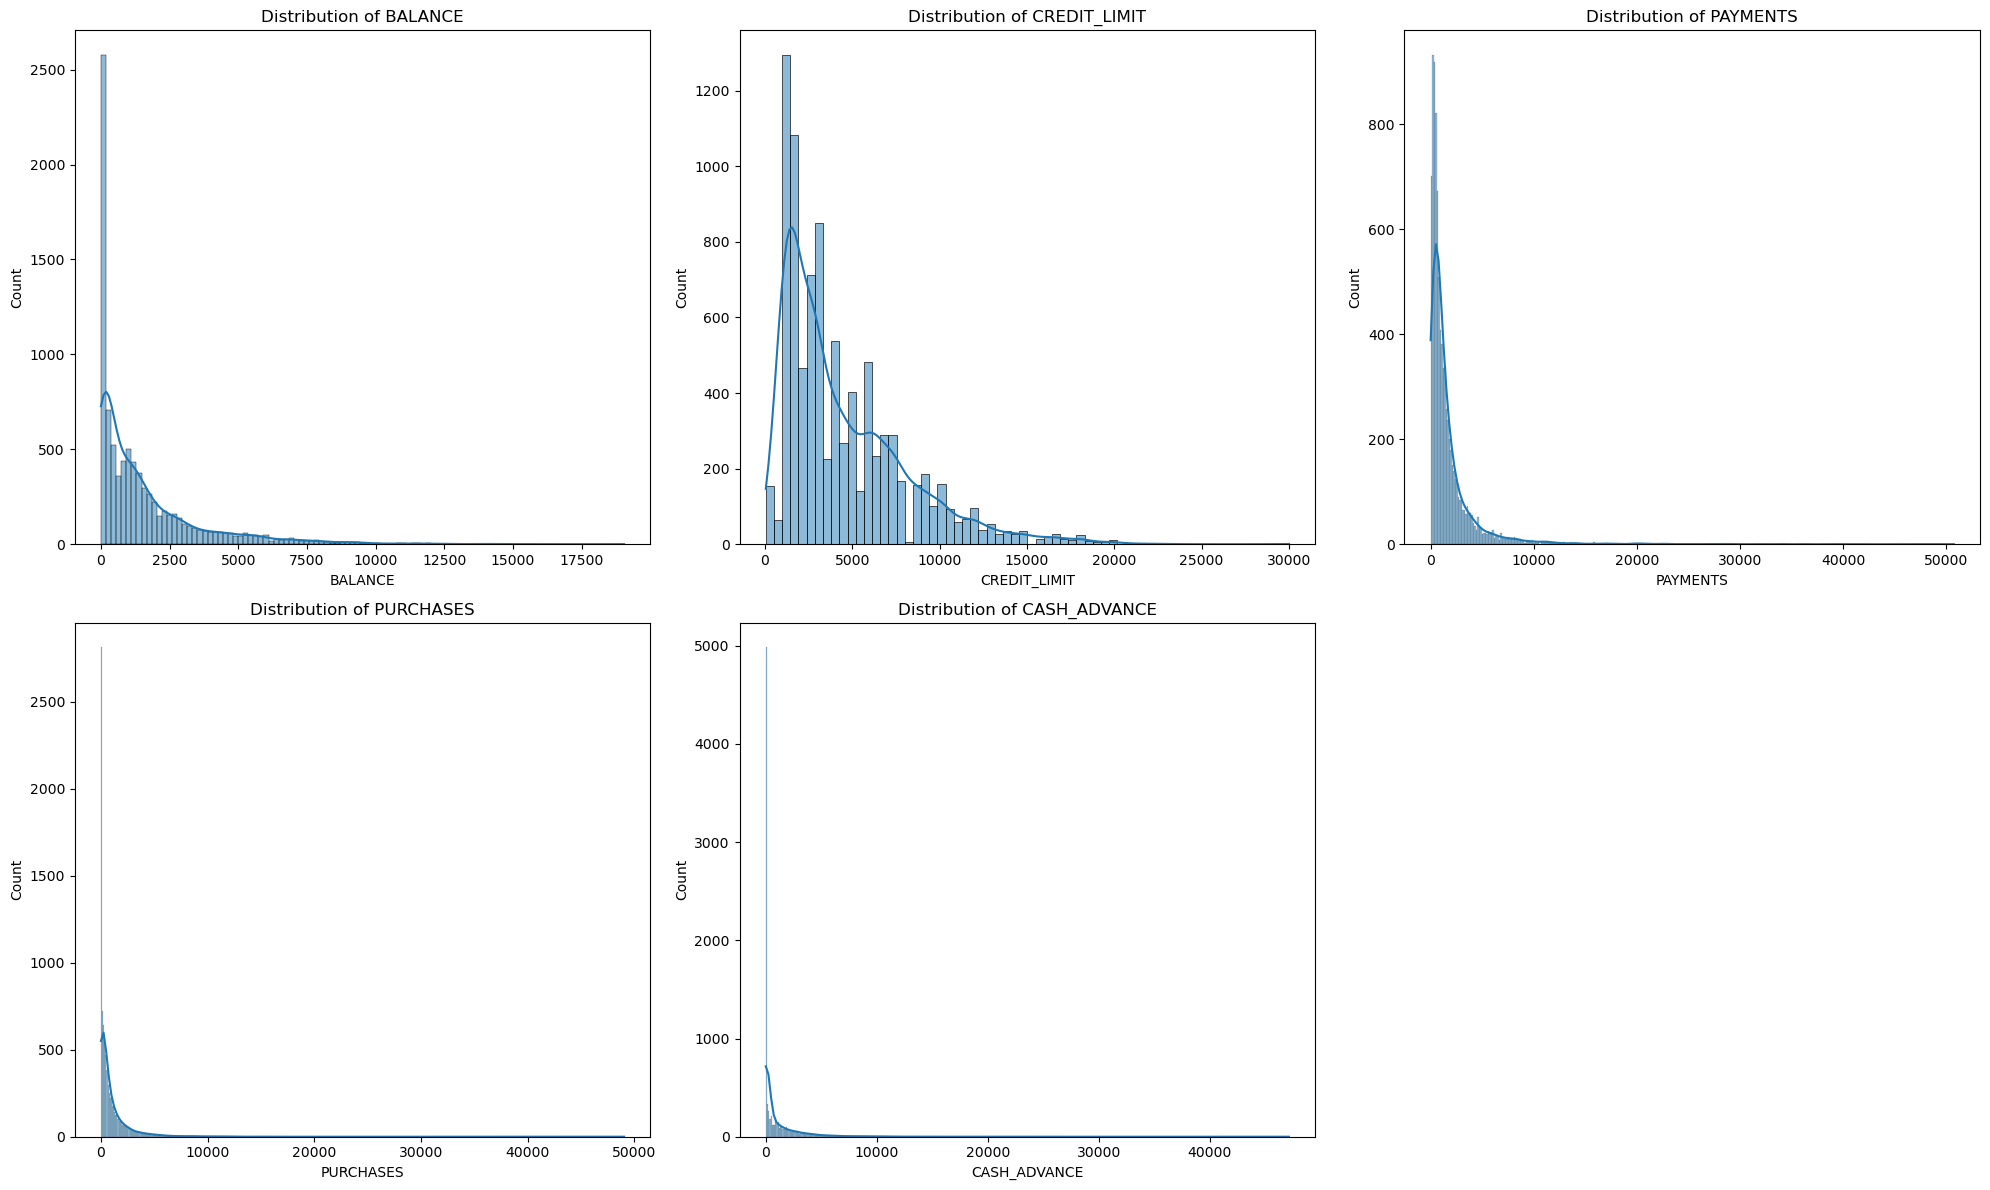

In [125]:
# Distribution of key financial metrics
plt.figure(figsize=(20, 12))
metrics = ['BALANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'PURCHASES', 'CASH_ADVANCE']
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    sns.histplot(creditcard_df[metric], kde=True)
    plt.title(f'Distribution of {metric}')
plt.tight_layout()
plt.show()

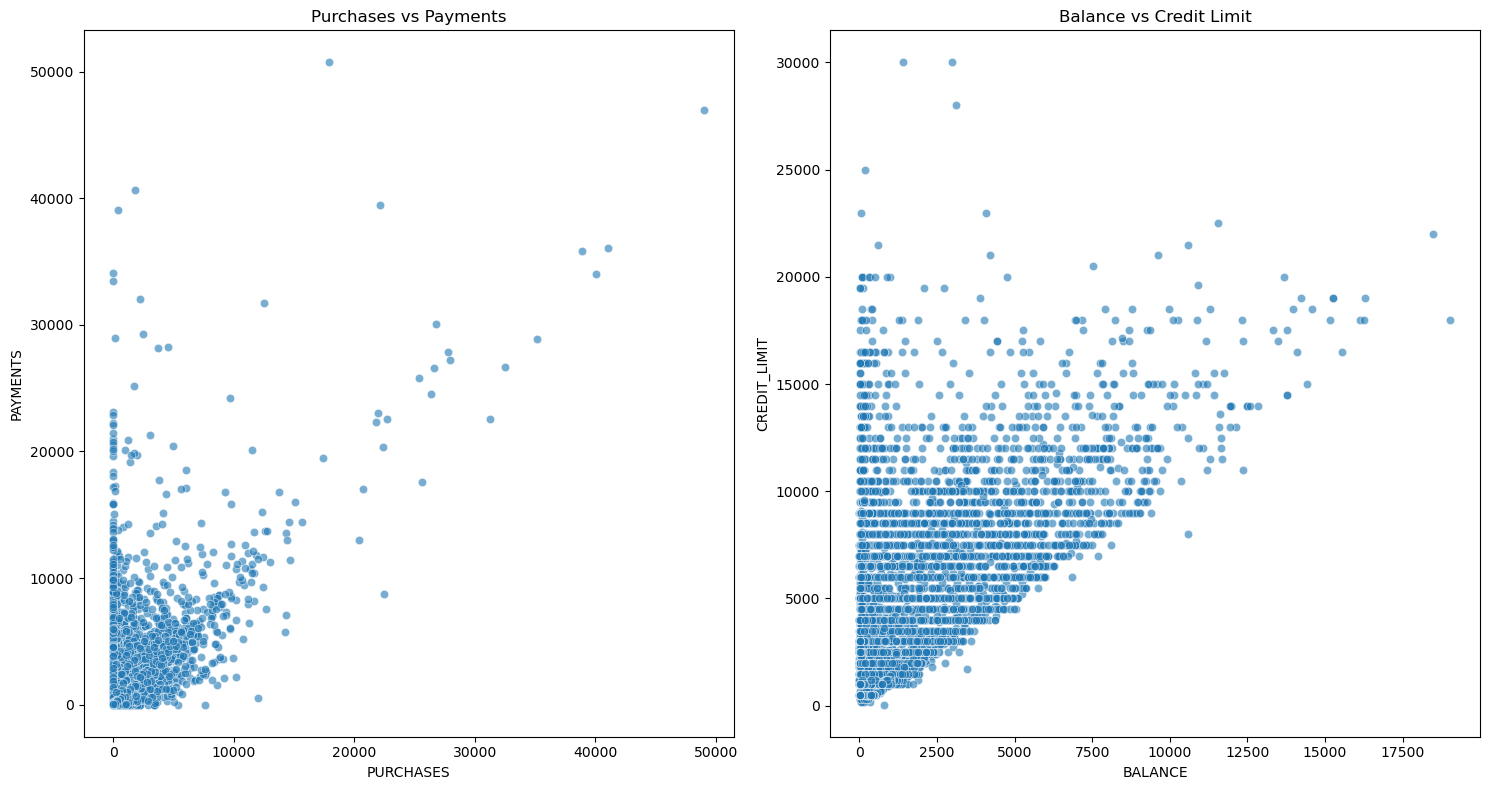

In [126]:
# Explore purchase and payment behavior
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(data=creditcard_df, x='PURCHASES', y='PAYMENTS', alpha=0.6)
plt.title('Purchases vs Payments')
plt.subplot(1, 2, 2)
sns.scatterplot(data=creditcard_df, x='BALANCE', y='CREDIT_LIMIT', alpha=0.6)
plt.title('Balance vs Credit Limit')
plt.tight_layout()
plt.show()

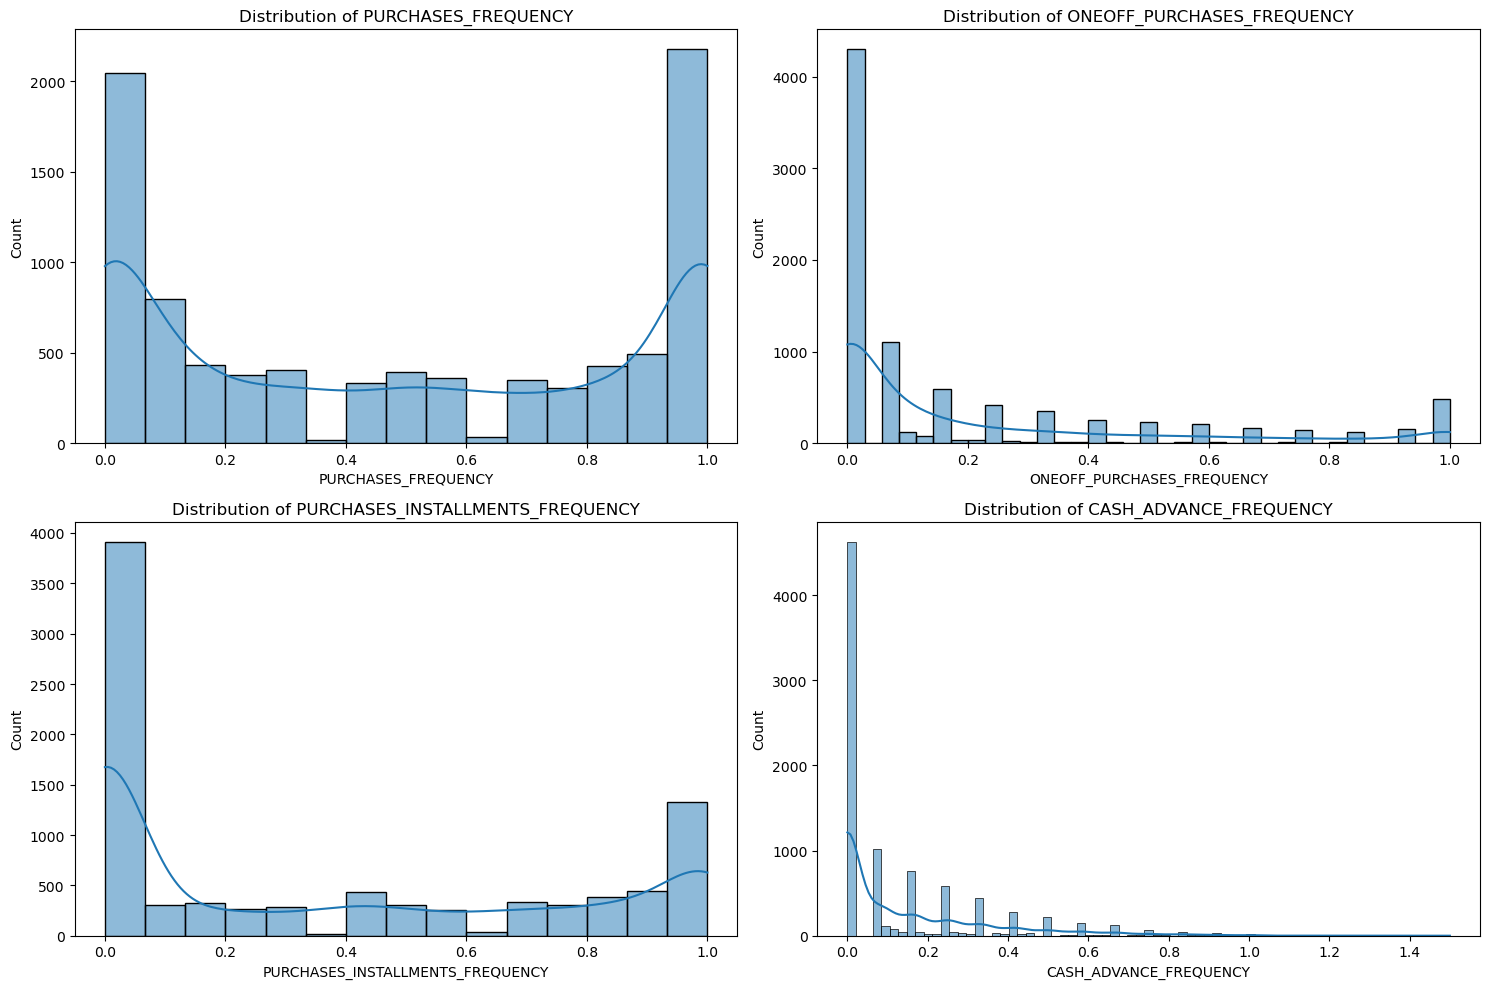

In [127]:
# Distribution of spending behaviors
plt.figure(figsize=(15, 10))
behavior_cols = ['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 
                'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']

for i, col in enumerate(behavior_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(creditcard_df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


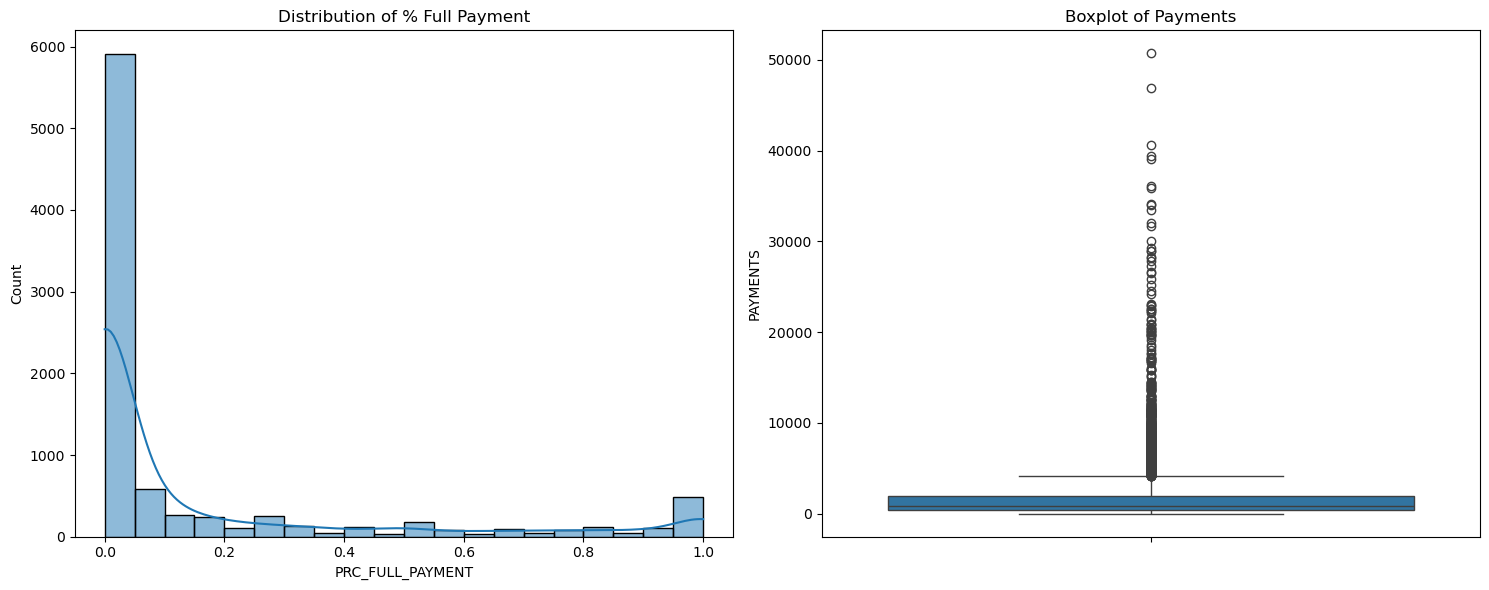

In [128]:
# Payment behavior analysis
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(creditcard_df['PRC_FULL_PAYMENT'], bins=20, kde=True)
plt.title('Distribution of % Full Payment')

plt.subplot(1, 2, 2)
sns.boxplot(y=creditcard_df['PAYMENTS'])
plt.title('Boxplot of Payments')
plt.tight_layout()
plt.show()

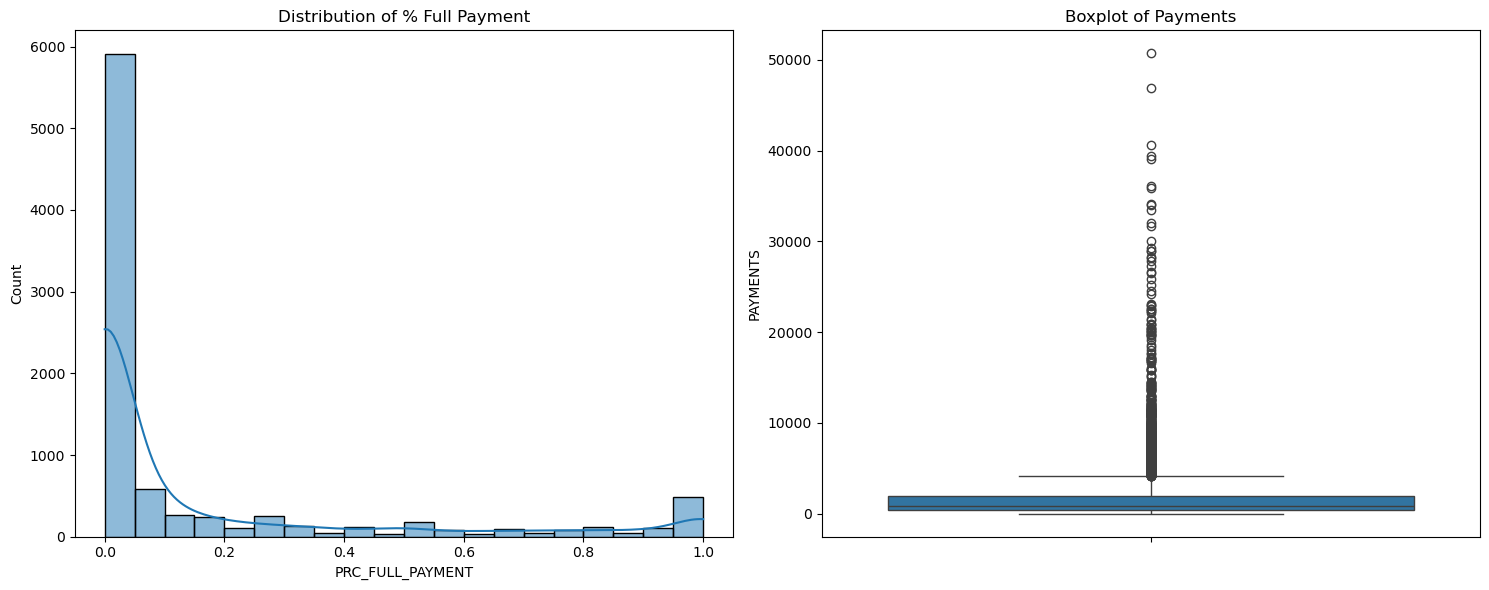

In [129]:
# Payment behavior analysis
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(creditcard_df['PRC_FULL_PAYMENT'], bins=20, kde=True)
plt.title('Distribution of % Full Payment')

plt.subplot(1, 2, 2)
sns.boxplot(y=creditcard_df['PAYMENTS'])
plt.title('Boxplot of Payments')
plt.tight_layout()
plt.show()

# **5. Outlier Detection**

In [130]:
# find outlier in all columns
for i in creditcard_df.select_dtypes(include=['float64','int64']).columns:
  max_thresold = creditcard_df[i].quantile(0.95)
  min_thresold = creditcard_df[i].quantile(0.05)
  creditcard_df_no_outlier = creditcard_df[(creditcard_df[i] < max_thresold) & (creditcard_df[i] > min_thresold)].shape
  print(" outlier in ",i,"is" ,int(((creditcard_df.shape[0]-creditcard_df_no_outlier[0])/creditcard_df.shape[0])*100),"%")

 outlier in  BALANCE is 10 %
 outlier in  BALANCE_FREQUENCY is 75 %
 outlier in  PURCHASES is 27 %
 outlier in  ONEOFF_PURCHASES is 53 %
 outlier in  INSTALLMENTS_PURCHASES is 48 %
 outlier in  CASH_ADVANCE is 56 %
 outlier in  PURCHASES_FREQUENCY is 47 %
 outlier in  ONEOFF_PURCHASES_FREQUENCY is 53 %
 outlier in  PURCHASES_INSTALLMENTS_FREQUENCY is 58 %
 outlier in  CASH_ADVANCE_FREQUENCY is 57 %
 outlier in  CASH_ADVANCE_TRX is 56 %
 outlier in  PURCHASES_TRX is 27 %
 outlier in  CREDIT_LIMIT is 14 %
 outlier in  PAYMENTS is 10 %
 outlier in  MINIMUM_PAYMENTS is 10 %
 outlier in  PRC_FULL_PAYMENT is 71 %
 outlier in  TENURE is 91 %
 outlier in  UTILIZATION_RATIO is 10 %
 outlier in  PAYMENT_RATIO is 10 %
 outlier in  CA_TO_PURCHASE_RATIO is 56 %
 outlier in  AVG_PURCHASE_SIZE is 27 %
 outlier in  INTEREST_EFFICIENCY is 10 %
 outlier in  TRANS_PER_MONTH is 27 %
 outlier in  CASH_ADV_PER_MONTH is 57 %
 outlier in  PAYMENT_TO_MIN_RATIO is 10 %
 outlier in  ONEOFF_TO_PURCHASE_RATIO is 5

In [131]:
# remove outliers from columns having nearly 10% outlier
max_thresold_BALANCE = creditcard_df["BALANCE"].quantile(0.95)
min_thresold_BALANCE = creditcard_df["BALANCE"].quantile(0.05)
max_thresold_CREDIT_LIMIT = creditcard_df["CREDIT_LIMIT"].quantile(0.95)
min_thresold_CREDIT_LIMIT = creditcard_df["CREDIT_LIMIT"].quantile(0.05)
max_thresold_PAYMENTS = creditcard_df["PAYMENTS"].quantile(0.95)
min_thresold_PAYMENTS = creditcard_df["PAYMENTS"].quantile(0.05)
creditcard_df_no_outlier = creditcard_df[(creditcard_df["CREDIT_LIMIT"] < max_thresold_CREDIT_LIMIT) & (creditcard_df["CREDIT_LIMIT"] > min_thresold_CREDIT_LIMIT) & (creditcard_df["BALANCE"] < max_thresold_BALANCE) & (creditcard_df["BALANCE"] > min_thresold_BALANCE) &  (creditcard_df["PAYMENTS"] < max_thresold_PAYMENTS) & (creditcard_df["PAYMENTS"] > min_thresold_PAYMENTS)]


In [132]:
# DataFrame having no outlier
creditcard_df_no_outlier.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENT_TO_MIN_RATIO,ONEOFF_TO_PURCHASE_RATIO,INSTALLMENT_TO_PURCHASE_RATIO,BALANCE_TO_PAYMENT_RATIO,PURCHASE_DIVERSITY,MONTHLY_SPEND_CONSISTENCY,DEBT_BURDEN_RATIO,CREDIT_UTILIZATION_TREND,CASH_VS_PURCHASE_PREFERENCE,PAYMENT_DISCIPLINE
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,...,3.826206,0.000000,0.000000,0.780510,0.0,0.000000,0.780510,0.415905,644294.5483,0.164144
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,...,0.991666,0.999987,0.000000,4.010998,77317.0,64.377186,4.010998,0.332687,0.0000,-0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,...,2.770961,0.999375,0.000000,1.205455,1600.0,1.332223,1.205455,0.681429,0.0000,0.000000
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,...,0.581599,0.000000,0.999992,1.292672,0.0,111.014155,1.292672,1.005460,0.0000,-0.000000
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.00,...,1.276333,0.000000,0.999977,2.685495,0.0,36.319734,2.685495,0.792892,0.0000,0.000000


In [133]:
creditcard_df_no_outlier.shape

(6466, 34)

<Axes: >

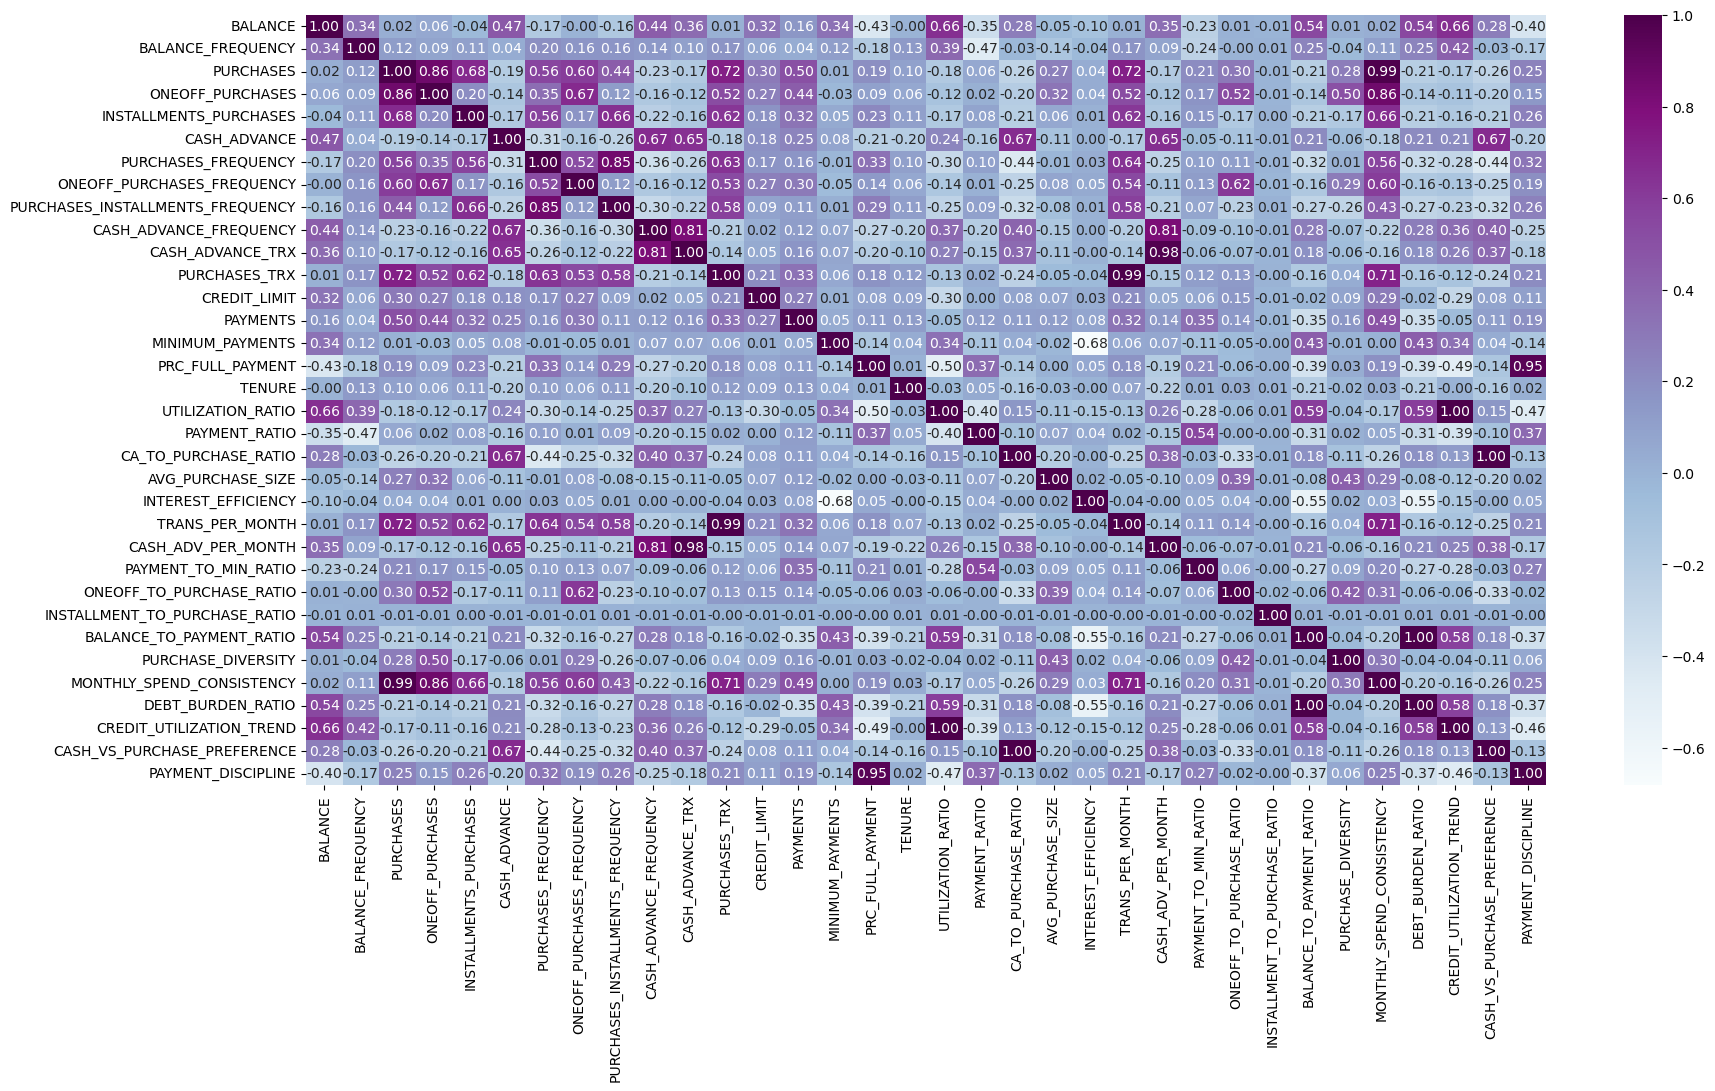

In [134]:
# correlation matrix of DataFrame
plt.figure(figsize=(20,10))
corn=creditcard_df_no_outlier.corr()
sns.heatmap(corn,annot=True,cmap="BuPu",fmt='.2f')

## From the results, we can see 3 pairs of strong correlation
1. "PURCHASES" and "ONEOFF_PURCHASES" -- 0.86
2. "PURCHASES_FREQUENCY" and 'PURCHASES_INSTALLMENT_FREQUENCY' --0.85
3. "CASH_ADVANCE_TRX" and "CASH_ADVANCE_FREQUENCY" --0.81

# **6. Scaling the data**

The next step is to scale our values to give them all equal importance. Scaling is also important from a clustering perspective as the distance between points affects the way clusters are formed.

Using the StandardScaler, we transform our dataframe into the following numpy arrays

In [135]:
# scale the DataFrame
scalar=StandardScaler()
creditcard_scaled_df = scalar.fit_transform(creditcard_df_no_outlier)

In [136]:
creditcard_scaled_df

array([[ 1.35958568, -0.02715353, -0.71136663, ...,  0.08110628,
         5.60316413,  0.20603634],
       [ 0.84268315,  0.48108734, -0.05912009, ..., -0.15719475,
        -0.36078021, -0.48734595],
       [-0.38317207,  0.48108734, -0.69786902, ...,  0.84144994,
        -0.36078021, -0.48734595],
       ...,
       [-0.94653953, -0.45069038, -0.51244565, ..., -1.03538819,
        -0.36078021,  0.99599358],
       [-0.96594456, -0.45069038, -0.61814878, ..., -1.07763117,
        -0.36078021,  0.76237283],
       [-0.92315108, -2.31424023, -0.71136663, ..., -1.01582102,
         0.66964599,  0.89875018]])

# **7. Dimensionality reduction**

-> Dimensionality reduction is a technique used to reduce the number of features in a dataset while retaining as much of the important information as possible. 

-> In other words, it is a process of transforming high-dimensional data into a lower-dimensional space that still preserves the essence of the original data.

-> This can be done for a variety of reasons, such as to reduce the complexity of a model, to reduce the storage space, to improve the performance of a learning algorithm, or to make it easier to visualize the data. 

-> There are several techniques for dimensionality reduction, 
* including principal component analysis (PCA), 
* singular value decomposition (SVD), 
* and linear discriminant analysis (LDA). 

Each technique uses a different method to project the data onto a lower-dimensional space while preserving important information.

In [137]:
# convert the DataFrame into 2D DataFrame for visualization
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_scaled_df)
pca_df = pd.DataFrame(data=principal_comp,columns=["pca1","pca2"])
pca_df.head()

,pca1,pca2
0,-4.366789,0.338931
1,0.531350,1.491890
2,-1.284027,-1.109024
3,-0.201999,0.962434
4,-0.429733,0.324577


# **8. Hyperparameter tuning**

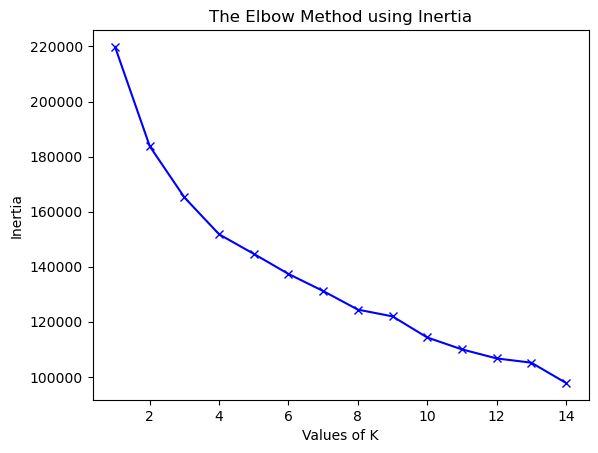

In [138]:
# find 'k' value by Elbow Method
inertia = []
range_val = range(1,15)
for i in range_val:
  kmean = KMeans(n_clusters=i)
  kmean.fit_predict(pd.DataFrame(creditcard_scaled_df))
  inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

From this plot, 4th cluster seems to be the elbow of the curve.
However, the values does not reduce to linearly until 8th cluster, so we may consider using 8 clusters in this case.

# **9. Model Building**

## ** K-Means Clustering**

In [139]:
# apply kmeans algorithm
kmeans_model=KMeans(4)
kmeans_model.fit_predict(creditcard_scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

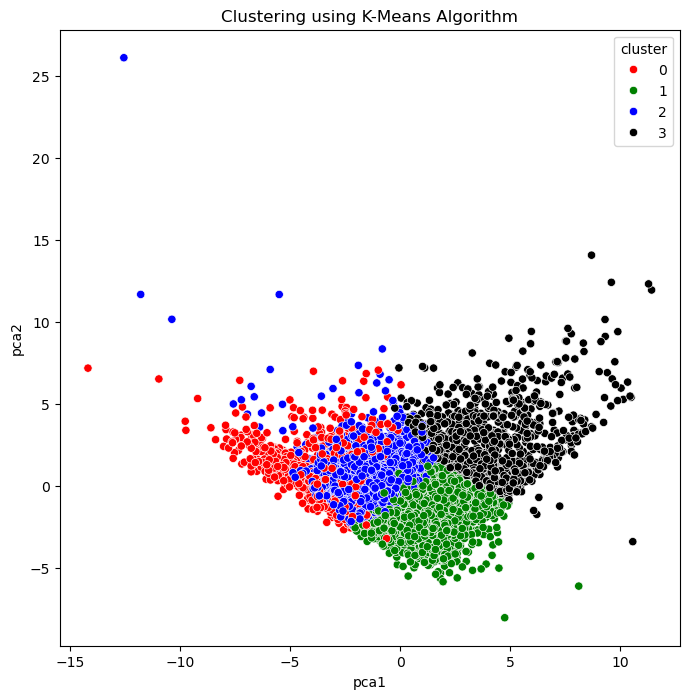

In [140]:
# visualize the clustered dataframe
# Scatter Plot
plt.figure(figsize=(8,8))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

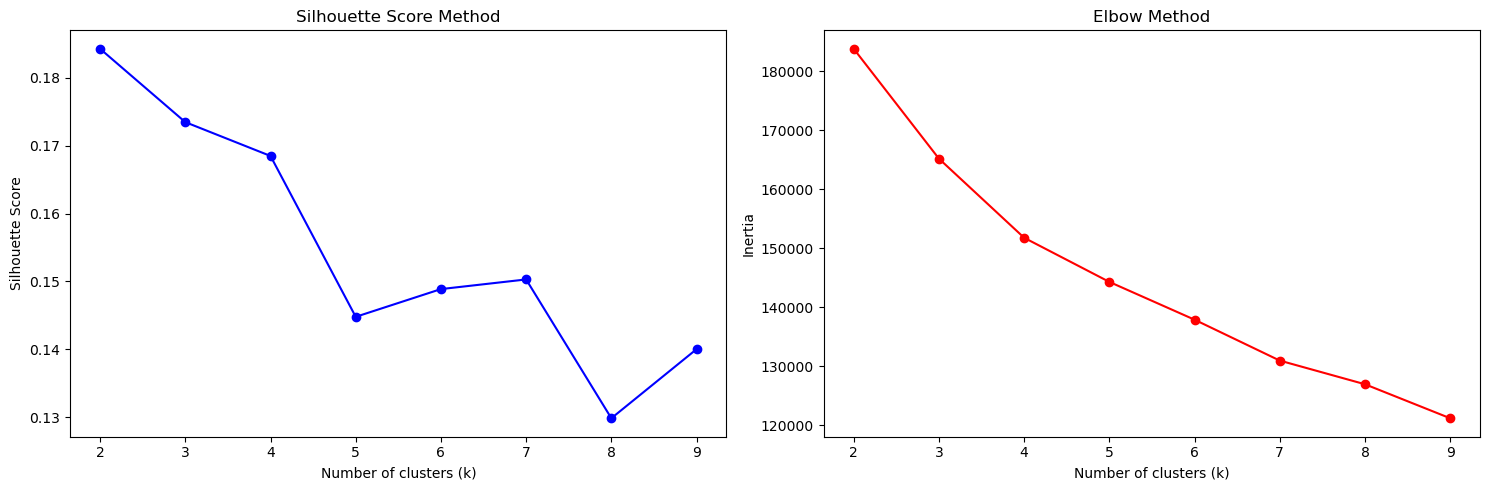

Optimal number of clusters based on silhouette score: 2
Hierarchical Clustering Silhouette Score: 0.16871395302451453
GMM Silhouette Score: 0.14283605177448724
Best clustering model: Hierarchical with silhouette score 0.1687


In [141]:
# Improved K selection with silhouette analysis
from sklearn.metrics import silhouette_score

silhouette_scores = []
inertia_values = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(creditcard_scaled_df)
    silhouette_scores.append(silhouette_score(creditcard_scaled_df, labels))
    inertia_values.append(kmeans.inertia_)

# Plot silhouette scores and inertia (elbow method) side by side
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')

plt.subplot(1, 2, 2)
plt.plot(k_range, inertia_values, 'ro-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.tight_layout()
plt.show()

# Find optimal k
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")

# Try hierarchical clustering
hier_model = AgglomerativeClustering(n_clusters=optimal_k)
hier_labels = hier_model.fit_predict(creditcard_scaled_df)
silhouette_hier = silhouette_score(creditcard_scaled_df, hier_labels)
print(f"Hierarchical Clustering Silhouette Score: {silhouette_hier}")

# Try Gaussian Mixture Models
gmm_model = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm_model.fit_predict(creditcard_scaled_df)
silhouette_gmm = silhouette_score(creditcard_scaled_df, gmm_labels)
print(f"GMM Silhouette Score: {silhouette_gmm}")

# Compare all methods
models_comparison = {
    'K-means': {'labels': kmeans_model.labels_, 'silhouette': silhouette_score(creditcard_scaled_df, kmeans_model.labels_)},
    'Hierarchical': {'labels': hier_labels, 'silhouette': silhouette_hier},
    'GMM': {'labels': gmm_labels, 'silhouette': silhouette_gmm}
}

# Find best model based on silhouette score
best_model_name = max(models_comparison, key=lambda x: models_comparison[x]['silhouette'])
best_model_labels = models_comparison[best_model_name]['labels']
print(f"Best clustering model: {best_model_name} with silhouette score {models_comparison[best_model_name]['silhouette']:.4f}")

## **9.1. Analyzing Clustering Output**

We've used K-Means model for clustering in this dataset.

In [142]:
kmeans_model.cluster_centers_.shape

(4, 34)

In [143]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[creditcard_df.columns])
# inverse transfor the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENT_TO_MIN_RATIO,ONEOFF_TO_PURCHASE_RATIO,INSTALLMENT_TO_PURCHASE_RATIO,BALANCE_TO_PAYMENT_RATIO,PURCHASE_DIVERSITY,MONTHLY_SPEND_CONSISTENCY,DEBT_BURDEN_RATIO,CREDIT_UTILIZATION_TREND,CASH_VS_PURCHASE_PREFERENCE,PAYMENT_DISCIPLINE
0,2541.913818,0.923365,155.149112,100.178642,55.014530,3447.059485,0.120468,0.061478,0.068959,0.457375,...,3.795978,0.164659,0.088155,2.643667,4719.908686,15.199450,2.643667,0.529410,238517.318227,0.029274
1,271.922271,0.817458,648.051189,281.646291,366.851322,171.861549,0.595878,0.165150,0.453643,0.030478,...,7.403739,0.370629,0.565606,0.337026,13572.463368,55.724487,0.337026,0.070272,5434.566098,0.208639
2,1973.877711,0.984952,401.517513,245.870884,155.747768,689.181910,0.336583,0.142247,0.214827,0.155748,...,1.522013,0.406199,1.101299,3.046060,13436.554231,34.890536,3.046060,0.700085,21354.597326,0.003812
3,1476.839209,0.976184,3178.321435,2003.808452,1175.246316,325.704558,0.920752,0.636143,0.703101,0.058741,...,9.995740,0.616423,0.383710,0.851612,38189.837807,269.644376,0.851612,0.280359,0.133620,0.239580


In [144]:
# create a column as "cluster" & store the respective cluster name that they belongs to
creditcard_cluster_df = pd.concat([creditcard_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
creditcard_cluster_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,ONEOFF_TO_PURCHASE_RATIO,INSTALLMENT_TO_PURCHASE_RATIO,BALANCE_TO_PAYMENT_RATIO,PURCHASE_DIVERSITY,MONTHLY_SPEND_CONSISTENCY,DEBT_BURDEN_RATIO,CREDIT_UTILIZATION_TREND,CASH_VS_PURCHASE_PREFERENCE,PAYMENT_DISCIPLINE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.000000,0.999895,0.202667,0.0,7.943381,0.202667,0.033464,0.000000,0.000000,0.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.000000,0.000000,0.780510,0.0,0.000000,0.780510,0.415905,644294.548300,0.164144,2.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.999987,0.000000,4.010998,77317.0,64.377186,4.010998,0.332687,0.000000,-0.000000,2.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.999993,0.000000,166667.054200,149900.0,124.812656,166667.054200,0.141415,0.137283,-0.000000,2.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.999375,0.000000,1.205455,1600.0,1.332223,1.205455,0.681429,0.000000,0.000000,2.0


In [145]:
def analyze_cluster(df, cluster_col='cluster', cluster_value=None, name=""):
    """Detailed analysis of a specific cluster"""
    if cluster_value is not None:
        cluster_data = df[df[cluster_col] == cluster_value]
    else:
        cluster_data = df
    
    print(f"\n===== {name} Cluster Analysis =====")
    print(f"Number of customers: {len(cluster_data)}")
    
    # Financial summary
    print("\n--- Financial Metrics ---")
    financial_cols = ['BALANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
    print(cluster_data[financial_cols].describe().round(2).T[['mean', 'std', 'min', '50%', 'max']])
    
    # Behavioral summary
    print("\n--- Behavioral Metrics ---")
    behavior_cols = ['PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']
    print(cluster_data[behavior_cols].describe().round(2).T[['mean', 'std', 'min', '50%', 'max']])
    
    # Purchase patterns
    print("\n--- Purchase Patterns ---")
    purchase_cols = ['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES_TRX']
    print(cluster_data[purchase_cols].describe().round(2).T[['mean', 'std', 'min', '50%', 'max']])
    
    return cluster_data

# Analyze each cluster
cluster_names = ["Transactors", "Revolvers", "VIP/Prime", "New Users"]
all_clusters_data = []

for i in range(4):
    cluster_data = analyze_cluster(creditcard_cluster_df, cluster_value=i, name=cluster_names[i])
    all_clusters_data.append(cluster_data)


===== Transactors Cluster Analysis =====
Number of customers: 787

--- Financial Metrics ---
                     mean      std     min      50%       max
BALANCE           1645.77  2101.10    0.00   971.27  13968.48
CREDIT_LIMIT      5057.48  3791.98  500.00  4000.00  30000.00
PAYMENTS          1871.26  2989.15    0.00  1027.15  40627.60
MINIMUM_PAYMENTS   962.87  2634.24    0.12   359.02  43132.73

--- Behavioral Metrics ---
                        mean   std  min  50%  max
PURCHASES_FREQUENCY     0.50  0.40  0.0  0.5  1.0
CASH_ADVANCE_FREQUENCY  0.14  0.20  0.0  0.0  1.0
PRC_FULL_PAYMENT        0.15  0.29  0.0  0.0  1.0

--- Purchase Patterns ---
                           mean      std  min     50%       max
PURCHASES               1013.29  1636.00  0.0  417.70  12784.51
ONEOFF_PURCHASES         600.39  1231.44  0.0   84.45  11246.07
INSTALLMENTS_PURCHASES   412.90   873.61  0.0   94.20  12375.00
PURCHASES_TRX             14.95    22.43  0.0    7.00    199.00

===== Revolvers Clus

In [146]:
unique_clusters = sorted(creditcard_cluster_df['cluster'].unique())
print(f"Unique cluster values: {unique_clusters}")
print(f"Number of unique clusters: {len(unique_clusters)}")

Unique cluster values: [0.0, 1.0, 2.0, 3.0, nan]
Number of unique clusters: 5


In [147]:
def radar_chart(df, cluster_col='cluster', metrics=None):
    """Generate radar chart comparing clusters on key metrics"""
    if metrics is None:
        metrics = ['BALANCE', 'CREDIT_LIMIT', 'PURCHASES', 'CASH_ADVANCE', 
                 'PRC_FULL_PAYMENT', 'UTILIZATION_RATIO']
    
    # Get unique cluster values
    unique_clusters = sorted(df[cluster_col].unique())
    
    # Make sure we have names for all clusters
    cluster_names_dict = {
        0: "Transactors", 
        1: "Revolvers", 
        2: "VIP/Prime", 
        3: "New Users"
    }
    
    # For any missing cluster names, create a generic one
    for cluster_id in unique_clusters:
        if cluster_id not in cluster_names_dict:
            cluster_names_dict[cluster_id] = f"Cluster {cluster_id}"
    
    # Get cluster means for each metric
    cluster_means = []
    for cluster_id in unique_clusters:
        cluster_data = df[df[cluster_col] == cluster_id]
        means = [cluster_data[metric].mean() for metric in metrics]
        cluster_means.append(means)
    
    # Normalize across clusters for comparability
    normalized_means = []
    for i in range(len(metrics)):
        col_values = [cluster[i] for cluster in cluster_means]
        col_min, col_max = min(col_values), max(col_values)
        if col_max == col_min:
            normalized_col = [0.5 for _ in col_values]  # All same value
        else:
            normalized_col = [(val - col_min) / (col_max - col_min) for val in col_values]
        
        for j in range(len(normalized_means), len(cluster_means)):
            normalized_means.append([])
        
        for j in range(len(normalized_means)):
            normalized_means[j].append(normalized_col[j])
    
    # Plot
    angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
    angles += angles[:1]  # Close the loop
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    for i, (values, cluster_id) in enumerate(zip(normalized_means, unique_clusters)):
        values += values[:1]  # Close the loop
        ax.plot(angles, values, linewidth=2, label=f"Cluster {cluster_id} ({cluster_names_dict[cluster_id]})")
        ax.fill(angles, values, alpha=0.1)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    ax.set_yticklabels([])
    plt.legend(loc='upper right')
    plt.title("Cluster Comparison on Key Metrics")
    plt.tight_layout()
    plt.show()

Generating radar chart comparison of all clusters...


<Figure size 1200x1000 with 0 Axes>

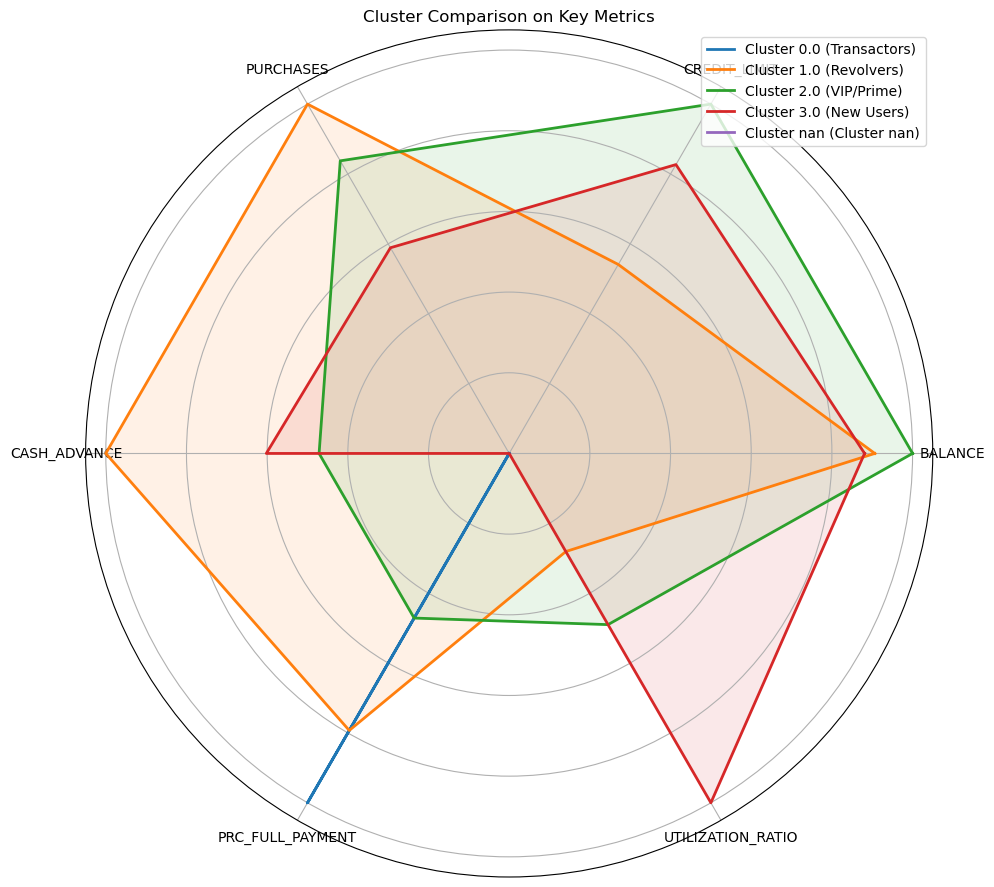

In [148]:
# Execute the radar chart visualization
print("Generating radar chart comparison of all clusters...")
# Create multiple radar charts with different metrics
plt.figure(figsize=(12, 10))

# Actually call the radar chart function!
radar_chart(creditcard_cluster_df)

In [149]:
# Define customer segments with clear descriptions and strategies
segment_descriptions = {
    "Transactors": {
        "description": "Customers who pay off their balances each month and use cards for purchases",
        "characteristics": "Low balance, high payment ratio, low interest charges",
        "strategy": "Reward programs focused on purchases, cashback offerings, premium cards with higher fees"
    },
    "Revolvers": {
        "description": "Customers who use credit card as a loan and carry balance month-to-month",
        "characteristics": "High balance, high cash advance, low payment ratio",
        "strategy": "Balance transfer offers, debt consolidation, financial education, lower APR promotions"
    },
    "VIP/Prime": {
        "description": "High-value customers with high credit limits and full payments",
        "characteristics": "High credit limit, high purchase volume, high full payment percentage",
        "strategy": "Premium services, exclusive rewards, higher limits, concierge services, luxury partnerships"
    },
    "New Users": {
        "description": "Customers with less tenure and lower overall activity",
        "characteristics": "Lower tenure, average metrics across other dimensions",
        "strategy": "Engagement campaigns, educational content, targeted rewards for specific behaviors"
    }
}

def generate_recommendations(segment_name, segment_data):
    """Generate business recommendations for a customer segment"""
    print(f"\n============ BUSINESS RECOMMENDATIONS FOR {segment_name} SEGMENT ============")
    print(f"\nSegment Description: {segment_descriptions[segment_name]['description']}")
    print(f"Key Characteristics: {segment_descriptions[segment_name]['characteristics']}")
    
    # Size and value
    segment_size = len(segment_data)
    total_size = len(creditcard_cluster_df)
    segment_pct = (segment_size / total_size) * 100
    
    avg_balance = segment_data['BALANCE'].mean()
    avg_credit_limit = segment_data['CREDIT_LIMIT'].mean()
    avg_purchases = segment_data['PURCHASES'].mean()
    
    print(f"\nSegment Size: {segment_size} customers ({segment_pct:.1f}% of portfolio)")
    print(f"Average Balance: ${avg_balance:.2f}")
    print(f"Average Credit Limit: ${avg_credit_limit:.2f}")
    print(f"Average Monthly Purchases: ${avg_purchases:.2f}")
    
    print("\n----- STRATEGIC RECOMMENDATIONS -----")
    print(f"Overall Strategy: {segment_descriptions[segment_name]['strategy']}")
    
    print("\nMarketing Recommendations:")
    if segment_name == "Transactors":
        print("1. Promote rewards cards with enhanced points on everyday spending")
        print("2. Emphasize cashback and loyalty benefits in communications")
        print("3. Cross-sell premium cards with annual fees but better rewards")
    elif segment_name == "Revolvers":
        print("1. Offer balance transfer promotions with extended 0% APR periods")
        print("2. Provide personal loan alternatives for debt consolidation")
        print("3. Implement gradual credit line increases to reduce utilization")
    elif segment_name == "VIP/Prime":
        print("1. Extend VIP treatment and concierge services")
        print("2. Create exclusive events and experiences for this segment")
        print("3. Proactively increase credit limits with special terms")
    else:  # New Users
        print("1. Create onboarding email series highlighting card benefits")
        print("2. Offer small incentives for increasing card usage in different categories")
        print("3. Provide educational content about credit building and management")
    
    return segment_data

# Generate recommendations for each segment
for i, name in enumerate(cluster_names):
    generate_recommendations(name, all_clusters_data[i])


============ BUSINESS RECOMMENDATIONS FOR Transactors SEGMENT ============

Segment Description: Customers who pay off their balances each month and use cards for purchases
Key Characteristics: Low balance, high payment ratio, low interest charges

Segment Size: 787 customers (8.8% of portfolio)
Average Balance: $1645.77
Average Credit Limit: $5057.48
Average Monthly Purchases: $1013.29

----- STRATEGIC RECOMMENDATIONS -----
Overall Strategy: Reward programs focused on purchases, cashback offerings, premium cards with higher fees

Marketing Recommendations:
1. Promote rewards cards with enhanced points on everyday spending
2. Emphasize cashback and loyalty benefits in communications
3. Cross-sell premium cards with annual fees but better rewards

============ BUSINESS RECOMMENDATIONS FOR Revolvers SEGMENT ============

Segment Description: Customers who use credit card as a loan and carry balance month-to-month
Key Characteristics: High balance, high cash advance, low payment ratio

S

## **9.2 Outcome**

-> There are 4 clusters (segments)- each clusters are shown below in detail:
* First Customers cluster (Transactors): Those are customers who pay least amount of interest charges and careful with their money, Cluster with lowest balance (104 Dollar) and cash advance (303 Dollar), Percentage of full payment = 23%

* Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance (5000 Dollar) and cash advance (5000 Dollar), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)

* Third customer cluster (VIP/Prime): high credit limit 16K Dollar and highest percentage of full payment, target for increase credit limit and increase spending habits

* Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 

## **9.3. Analysis of each Cluster**

### Cluster - 1

In [150]:
cluster_1_df = creditcard_cluster_df[creditcard_cluster_df["cluster"]==0]
cluster_1_df.sort_values(by=['BALANCE'], ascending=False).head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,ONEOFF_TO_PURCHASE_RATIO,INSTALLMENT_TO_PURCHASE_RATIO,BALANCE_TO_PAYMENT_RATIO,PURCHASE_DIVERSITY,MONTHLY_SPEND_CONSISTENCY,DEBT_BURDEN_RATIO,CREDIT_UTILIZATION_TREND,CASH_VS_PURCHASE_PREFERENCE,PAYMENT_DISCIPLINE,cluster
4089,13968.479570,1.0,281.71,8.90,272.81,2710.679764,0.416667,0.083333,0.333333,0.666667,...,0.031592,0.968373,4.031945,0.032622,23.456286,4.031945,0.755053,9.621893e+00,0.0,0.0
723,13774.741540,1.0,404.24,0.00,404.24,3369.474535,0.250000,0.000000,0.250000,0.500000,...,0.000000,0.999975,4.348251,0.000000,33.658618,4.348251,0.949982,8.335126e+00,-0.0,0.0
2454,10915.550750,1.0,0.00,0.00,0.00,23130.821060,0.000000,0.000000,0.000000,0.583333,...,0.000000,0.000000,0.595113,0.000000,0.000000,0.595113,0.727703,2.313082e+06,0.0,0.0
2088,10599.442300,1.0,4029.24,2926.43,1102.81,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.726296,0.273701,4.523257,2.653588,335.490425,4.523257,0.847955,0.000000e+00,-0.0,0.0
6078,9749.239122,1.0,1552.63,0.00,1552.63,5139.766338,1.000000,0.000000,1.000000,0.416667,...,0.000000,0.999994,3.250116,0.000000,129.278102,3.250116,0.886294,3.310340e+00,-0.0,0.0


### Cluster - 2

In [151]:
cluster_2_df = creditcard_cluster_df[creditcard_cluster_df["cluster"]==1]
cluster_2_df.sort_values(by=['BALANCE'], ascending=False).head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,ONEOFF_TO_PURCHASE_RATIO,INSTALLMENT_TO_PURCHASE_RATIO,BALANCE_TO_PAYMENT_RATIO,PURCHASE_DIVERSITY,MONTHLY_SPEND_CONSISTENCY,DEBT_BURDEN_RATIO,CREDIT_UTILIZATION_TREND,CASH_VS_PURCHASE_PREFERENCE,PAYMENT_DISCIPLINE,cluster
5488,16304.88925,1.0,1770.57,0.00,1770.57,7424.094447,0.5,0.000000,0.416667,0.666667,...,0.000000,0.999994,3.054511,0.000000,147.424646,3.054511,0.858152,4.193030,-0.0,1.0
5281,16115.59640,1.0,684.74,105.30,579.44,4354.002428,1.0,0.083333,1.000000,0.583333,...,0.153779,0.846207,4.544634,0.181724,57.014155,4.544634,0.895311,6.358529,-0.0,1.0
520,15258.22590,1.0,529.30,529.30,0.00,4100.891579,0.5,0.500000,0.000000,1.000000,...,0.999981,0.000000,7.438841,52930.000000,66.079900,7.438841,0.803065,7.747618,-0.0,1.0
585,15244.74865,1.0,7823.74,7564.81,258.93,2621.049473,1.0,1.000000,1.000000,0.083333,...,0.966903,0.033095,1.370509,29.214528,651.435470,1.370509,0.802355,0.335012,0.0,1.0
4708,15155.53286,1.0,717.24,717.24,0.00,4718.274895,1.0,1.000000,0.000000,0.500000,...,0.999986,0.000000,3.786796,71724.000000,59.720233,3.786796,0.841974,6.578285,0.0,1.0


### Cluster - 3 (Silver)

In [152]:
cluster_3_df = creditcard_cluster_df[creditcard_cluster_df["cluster"]==2]
cluster_3_df.sort_values(by=['BALANCE'], ascending=False).head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,ONEOFF_TO_PURCHASE_RATIO,INSTALLMENT_TO_PURCHASE_RATIO,BALANCE_TO_PAYMENT_RATIO,PURCHASE_DIVERSITY,MONTHLY_SPEND_CONSISTENCY,DEBT_BURDEN_RATIO,CREDIT_UTILIZATION_TREND,CASH_VS_PURCHASE_PREFERENCE,PAYMENT_DISCIPLINE,cluster
138,19043.13856,1.0,22009.92,9449.07,12560.85,0.000000,1.0,0.750000,1.0,0.000000,...,0.429309,0.570690,0.827294,0.752263,1832.632806,0.827294,1.057952,0.000000e+00,0.0,2.0
4140,18495.55855,1.0,5288.28,3657.30,1630.98,0.000000,1.0,0.583333,1.0,0.000000,...,0.691585,0.308413,4.355813,2.242380,440.323064,4.355813,0.840707,0.000000e+00,0.0,2.0
883,14581.45914,1.0,0.00,0.00,0.00,22665.778500,0.0,0.000000,0.0,0.833333,...,0.000000,0.000000,0.696300,0.000000,0.000000,0.696300,0.788187,2.266578e+06,0.0,2.0
643,14411.95798,1.0,5958.17,3161.46,2796.71,0.000000,1.0,0.583333,1.0,0.000000,...,0.530608,0.469390,1.838316,1.130417,496.100749,1.838316,0.960797,0.000000e+00,-0.0,2.0
124,14224.11541,1.0,0.00,0.00,0.00,4614.427403,0.0,0.000000,0.0,0.333333,...,0.000000,0.000000,4.638363,0.000000,0.000000,4.638363,0.748638,4.614427e+05,-0.0,2.0


### Cluster - 4

In [153]:
cluster_4_df = creditcard_cluster_df[creditcard_cluster_df["cluster"] == 3]
cluster_4_df.sort_values(by=['BALANCE'], ascending=False).head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,ONEOFF_TO_PURCHASE_RATIO,INSTALLMENT_TO_PURCHASE_RATIO,BALANCE_TO_PAYMENT_RATIO,PURCHASE_DIVERSITY,MONTHLY_SPEND_CONSISTENCY,DEBT_BURDEN_RATIO,CREDIT_UTILIZATION_TREND,CASH_VS_PURCHASE_PREFERENCE,PAYMENT_DISCIPLINE,cluster
2361,15532.33972,1.0,1168.75,0.0,1168.75,3183.037625,0.916667,0.000000,0.916667,0.250000,...,0.000000,0.999991,3.975772,0.000000,97.314738,3.975772,0.941354,2.723431,0.0,3.0
495,12478.17286,1.0,174.00,174.0,0.00,3269.418821,0.250000,0.250000,0.000000,0.666667,...,0.999943,0.000000,3.838020,17400.000000,14.487927,3.838020,0.891298,18.788684,-0.0,3.0
866,11654.55492,1.0,463.00,74.0,389.00,3096.807933,0.583333,0.083333,0.416667,0.416667,...,0.159824,0.840155,3.853230,0.190226,38.551207,3.853230,0.932364,6.688426,-0.0,3.0
3210,10871.08518,1.0,0.00,0.0,0.00,4822.559803,0.000000,0.000000,0.000000,0.166667,...,0.000000,0.000000,3.973881,0.000000,0.000000,3.973881,0.603949,482255.980300,0.0,3.0
755,10397.09989,1.0,0.00,0.0,0.00,4045.620171,0.000000,0.000000,0.000000,0.250000,...,0.000000,0.000000,3.226729,0.000000,0.000000,3.226729,0.799777,404562.017100,0.0,3.0


# **10. Save The Model**

In [154]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [155]:
# save the dataframe in .csv file named as "Clustered_Costumer_Data"
creditcard_cluster_df.to_csv("Clustered_Customer_Data.csv")

# **11. Model Deployment Framework**


In [156]:
def predict_customer_segment(customer_data, model=kmeans_model, scaler=scalar, segment_names=cluster_names):
    """
    Predict the customer segment for new customer data
    
    Parameters:
    customer_data: pandas DataFrame with same columns as training data
    model: trained clustering model
    scaler: fitted scaler object
    segment_names: list of segment name strings
    
    Returns:
    segment_id: cluster ID
    segment_name: human-readable segment name
    segment_description: description of the segment
    """
    # Make sure all expected columns are present
    required_columns = [col for col in creditcard_df.columns if col not in ['cluster']]
    missing_cols = [col for col in required_columns if col not in customer_data.columns]
    
    if missing_cols:
        raise ValueError(f"Missing required columns: {missing_cols}")
    
    # Ensure data is in the correct format
    customer_data = customer_data[required_columns].copy()
    
    # Scale the data
    scaled_data = scaler.transform(customer_data)
    
    # Predict cluster
    cluster_id = model.predict(scaled_data)[0]
    
    # Return results
    return {
        'segment_id': int(cluster_id),
        'segment_name': segment_names[cluster_id],
        'segment_description': segment_descriptions[segment_names[cluster_id]]['description'],
        'recommended_strategy': segment_descriptions[segment_names[cluster_id]]['strategy']
    }

# Example of using the prediction function with new customer data
print("\n===== MODEL DEPLOYMENT EXAMPLE =====")
print("Predicting segment for a new customer:")

# Create a sample new customer
new_customer = creditcard_df.iloc[[0]].copy()  # Using the first customer as an example
print("New Customer Data (sample):")
print(new_customer[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT']].to_dict('records')[0])

# Predict segment
prediction = predict_customer_segment(new_customer)
print("\nPrediction Results:")
print(f"Segment ID: {prediction['segment_id']}")
print(f"Segment Name: {prediction['segment_name']}")
print(f"Segment Description: {prediction['segment_description']}")
print(f"Recommended Strategy: {prediction['recommended_strategy']}")


===== MODEL DEPLOYMENT EXAMPLE =====
Predicting segment for a new customer:
New Customer Data (sample):
{'BALANCE': 40.900749, 'PURCHASES': 95.4, 'CASH_ADVANCE': 0.0, 'CREDIT_LIMIT': 1000.0}

Prediction Results:
Segment ID: 1
Segment Name: Revolvers
Segment Description: Customers who use credit card as a loan and carry balance month-to-month
Recommended Strategy: Balance transfer offers, debt consolidation, financial education, lower APR promotions
